<h1>The Influence of Alchemix Adoption on ALCX Price</h1>
CrypGOAT da GOAT

<h2>Description</h2>
The following code estimates the relationship between the number of unique Alchemix accounts created and the ALCX token price. User count and price data for this calculation comes from Flipside's Velocity database, updated daily and accessed through the following query (https://velocity-app.flipsidecrypto.com/shareable/user-adoption-e21X2e). Analysts may find this code useful for the following purposes:

- Understanding the linear correlation between user accounts created and ALCX token price (both on an individual day basis and since ALCX's inception).
- Using the processed dataframes that provide standardized user and price data (baseline set to Feb. 27, 2021), daily changes in price and user data, and daily percentage changes in price and user data for other prediction models.

<h2>Imports</h2>

In [8]:
#Importing libraries
import requests as rq
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [9]:
#Import API data
url = rq.get('https://api.flipsidecrypto.com/api/v2/queries/72d79bd5-9cb5-4d17-8d97-dd29edbaba75/data/latest')
raw_dataset = url.json()
dataset = pd.DataFrame(raw_dataset)
dataset.describe()

,PRICE,USER_COUNT
count,44.000000,44.000000
mean,1450.447845,5244.522727
std,411.936963,1982.200510
min,349.723161,1055.000000
25%,1173.483206,3615.500000
50%,1527.538848,5691.500000
75%,1812.533358,6867.500000
max,1970.531869,8151.000000


<h2>Data Processing</h2>
The following code creates three new dataframes from the initial SQL query. The first dataframe ("Standardized Data") contains price and user data relative to their respective baselines on February 27, 2021. The second dataframe ("Daily Changes in Users and Price") contains the absolute values of the differences in users and prices between day (x+1) to day(x). The third dataframe ('Daily Percentage Changes in Users and Price') contains the percentage values of the differences in users and prices between day (x+1) to day(x).

In [10]:
#Standardize Data (relative to February 27, 2021)
standard_users=[]
for day in range(len(dataset['USER_COUNT'])):
    standard_users.append(dataset['USER_COUNT'][day]/dataset['USER_COUNT'][0])

standard_price=[]
for day in range(len(dataset['PRICE'])):
    standard_price.append(dataset['PRICE'][day]/dataset['PRICE'][0])

standard_dataframe=pd.DataFrame({'date':dataset['BALANCE_DATE'],'standard_users':standard_users,'standard_price':standard_price})

In [11]:
#Calculating change in users and price
difference_users=[]
for day in range(len(dataset['USER_COUNT'])-1):
    difference_users.append(dataset['USER_COUNT'][day+1]-dataset['USER_COUNT'][day])

difference_price=[]
for day in range(len(dataset['PRICE'])-1):
    difference_price.append(dataset['PRICE'][day+1]-dataset['PRICE'][day])

difference_dates=list(dataset['BALANCE_DATE'][1:])

difference_dataframe=pd.DataFrame({'date':difference_dates,'users':difference_users,'price':difference_price})

In [12]:
#Percentage difference
perc_difference_users=[]
for day in range(len(dataset['USER_COUNT'])-1):
    perc_difference_users.append(((dataset['USER_COUNT'][day+1]-dataset['USER_COUNT'][day])/dataset['USER_COUNT'][day])*100)

perc_difference_price=[]
for day in range(len(dataset['PRICE'])-1):
    perc_difference_price.append(((dataset['PRICE'][day+1]-dataset['PRICE'][day])/dataset['PRICE'][day])*100)

perc_difference_dataframe=pd.DataFrame({'date':difference_dates,'users':perc_difference_users,'price':perc_difference_price})
perc_difference_dataframe.describe()

,users,price
count,43.000000,43.000000
mean,5.080351,5.444921
std,7.143169,21.180312
min,0.016171,-17.076804
25%,1.593509,-3.524649
50%,2.480717,1.817290
75%,4.768926,8.293566
max,36.336780,123.808120


<h2>Exploratory Analysis</h2>
The following graph plots the change in ALCX users and prices over time from February 27, 2021 onwards.

In [13]:
#Bar chart of change over time
plt.plot(graph_dates,difference_users_percentage, label='Users')
plt.plot(graph_dates,difference_price_percentage, label='Price')
plt.legend(loc='upper right', frameon=False)
plt.title('% Change in ALCX Users and Price vs. Time')
plt.xticks(ticks = [])
plt.xlabel('day')
plt.ylabel('% daily change')
plt.show()

NameError: name 'graph_dates' is not defined

<h2>Regression Results</h2>

In [60]:
#Linear Regression (change over time)
X_time_reg = dataset['USER_COUNT'].values.reshape(-1,1)
y_time_reg = dataset['PRICE'].values.reshape(-1,1)
time_reg = LinearRegression().fit(X_time_reg,y_time_reg)
time_reg_score = time_reg.score(X_time_reg,y_time_reg)
time_reg_intercept = time_reg.intercept_
time_reg_pred = time_reg.predict(dataset['USER_COUNT'].values.reshape(-1,1))

print('R^2 = '+str(time_reg_score)[:4])
print('intercept = '+ str(time_reg_intercept)[1:7])

R^2 = 0.72
intercept = 524.43


In [61]:
#Linear Regression (daily change)
X_reg = difference_dataframe['users'].values.reshape(-1,1)
y_reg = difference_dataframe['price'].values.reshape(-1,1)
daily_reg = LinearRegression().fit(X_reg,y_reg) 
daily_reg_score = daily_reg.score(X_reg,y_reg)
daily_reg_intercept = daily_reg.intercept_
daily_reg_pred = daily_reg.predict(difference_dataframe['users'].values.reshape(-1,1))

print('R^2 = '+str(daily_reg_score)[:4])
print('intercept = '+ str(daily_reg_intercept)[1:7])

R^2 = 0.59
intercept = -6.175


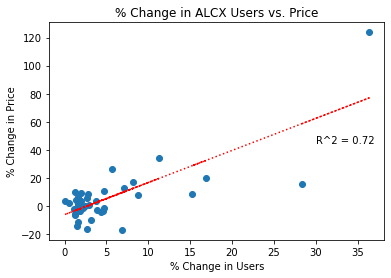

In [40]:
#Scatter Plot, Change in Users vs Change in Price
plt.scatter(difference_users_percentage,difference_price_percentage)
plt.title('% Change in ALCX Users vs. Price')
plt.xlabel('% Change in Users')
plt.ylabel('% Change in Price')

#Add regression line
plt.plot(difference_users_percentage, daily_reg_pred, daily_reg_intercept, linestyle = ':', color = 'red')
plt.annotate('R^2 = ' + str(time_reg_score)[:4], [30,45])

#Show
plt.show()